In [21]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [22]:
codontab = {
    'TCA': 'S', 'TCC': 'S', 'TCG': 'S', 'TCT': 'S',
    'TTC': 'F', 'TTT': 'F',
    'TTA': 'L', 'TTG': 'L', 'CTA': 'L', 'CTC': 'L', 'CTG': 'L','CTT': 'L',
    'TAC': 'Y', 'TAT': 'Y',
    'TAA': '*', 'TAG': '*', 'TGA': '*',
    'TGC': 'C', 'TGT': 'C',
    'TGG': 'W',
    'CCA': 'P', 'CCC': 'P', 'CCG': 'P', 'CCT': 'P',
    'CAC': 'H', 'CAT': 'H',
    'CAA': 'Q', 'CAG': 'Q',
    'CGA': 'R', 'CGC': 'R', 'CGG': 'R','CGT': 'R', 'AGA': 'R', 'AGG': 'R',
    'ATA': 'I', 'ATC': 'I', 'ATT': 'I',
    'ATG': 'M',
    'ACA': 'T', 'ACC': 'T', 'ACG': 'T', 'ACT': 'T',
    'AAC': 'N', 'AAT': 'N',
    'AAA': 'K', 'AAG': 'K',
    'AGC': 'S', 'AGT': 'S',
    'GTA': 'V', 'GTC': 'V', 'GTG': 'V', 'GTT': 'V',
    'GCA': 'A', 'GCC': 'A', 'GCG': 'A', 'GCT': 'A',
    'GAC': 'D', 'GAT': 'D',
    'GAA': 'E', 'GAG': 'E',
    'GGA': 'G', 'GGC': 'G', 'GGG': 'G', 'GGT': 'G'
}

AAs = []
codons = []
for codon, AA in codontab.items():
    AAs.append(AA)
    codons.append(codon.replace('T','U'))

AA_codon = pd.DataFrame({'AA':AAs, 'codon':codons})
display(AA_codon)

,AA,codon
0,S,UCA
1,S,UCC
2,S,UCG
3,S,UCU
4,F,UUC
...,...,...
59,E,GAG
60,G,GGA
61,G,GGC
62,G,GGG


In [29]:
# Loading data
data = {}
for site in ['A','P']:
    data[site] = pd.read_csv(f'{Project}/Results/Tables/Codon_analysis/codon_prediction/v20220913/adi_{site}-codon-Pred_avg-dPCT_gene-level.tsv', sep='\t')
    data[site] = pd.merge(AA_codon, data[site], on='codon', how='right')
    data[site]['AA_codon'] = data[site]['codon']+' '+data[site]['AA']
    data[site] = data[site].set_index('AA_codon', drop=True).drop(index=['UAA *','UAG *','UGA *']).drop(columns=['AA','codon'])

display(data[site])

,D4a,D4b,D4c,D8a,D8b,D8c
AA_codon,,,,,,
UUU F,0.556820,0.375373,0.636448,0.394401,0.478325,0.511134
UUC F,0.347875,0.165563,0.404144,0.173445,0.139642,-0.031642
UUA L,-0.046395,0.034373,-0.045280,-0.064114,-0.055596,-0.068490
UUG L,-0.136009,-0.056337,-0.070193,-0.052857,-0.137739,-0.006609
UCU S,0.123782,0.166323,0.157590,0.061515,0.021012,0.019324
...,...,...,...,...,...,...
GAG E,-0.112872,-0.032653,-0.060342,0.034279,0.314746,0.649542
GGU G,0.111067,0.319142,0.258213,0.301545,0.572557,0.489728
GGC G,0.151111,0.270782,0.180894,0.291565,0.465494,0.275013


<Figure size 640x480 with 0 Axes>

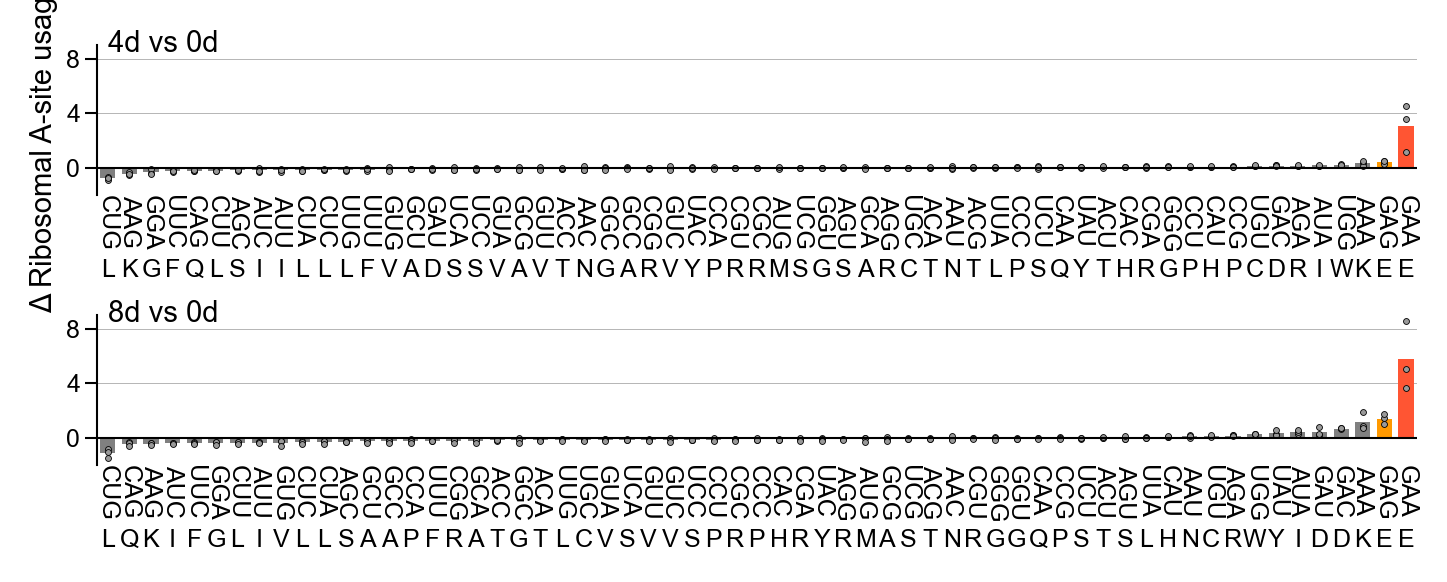

In [59]:
site = 'A'

ylims = {'4' : (-2, 9),
         '8' : (-2, 9)}
yticks= {'4' : [0,4,8],
         '8' : [0,4,8]}

sF = 1 # Size factor
wgap = 0.1
hgap = 0.4
nrow, ncol = 2, 1

width_ratios = [4.4]
height_ratios = [0.5, 0.5]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
for day in ['4','8']:
    
    tmp_data = data[site][[f'D{day}{rep}' for rep in ['a','b','c']]].copy()
    tmp_data['avg'] = tmp_data.mean(axis=1)
    tmp_data = tmp_data.sort_values('avg').drop(columns='avg')

    # Top 10 decreased codon
    ax = fig.add_subplot(grid[row,0])

    plot_data = tmp_data
    leng = len(plot_data)

    # err_kw = dict(lw=0.5, capsize=4, capthick=0.5)
    ax.bar([*range(leng)], plot_data.mean(axis=1).tolist(), width=0.7, color=['gray']*59+['#FF9900','#FF5533']) #, yerr=plot_data.std(ddof=1, axis=1).tolist(), error_kw=err_kw)
    for rep,s in zip(plot_data.keys(),[30,30,30]):
        ax.scatter([*range(leng)], plot_data[rep], s=2, c='#999999', edgecolors='k', lw=0.2, zorder=1.5)
    ax.axhline(0, c='k', lw=0.5)
    
    ax.set_xlim(0 -0.5, leng -0.5)
    ax.set_ylim(ylims[day])
    ax.set_xticks(range(leng))
    ax.set_yticks(yticks[day])
    ax.set_xticklabels(plot_data.index.str[:-2], rotation=-90, ha='center')
    for i, AA in enumerate(plot_data.index.str[-1]): ax.text(i, -8, AA, fontsize=6, ha='center')
    ax.tick_params(width=0.5, length=3, pad=1)
    ax.tick_params(axis='x', length=0, pad=0)
    ax.grid(axis='y', c='#AAAAAA', ls='-', lw=0.2)
    
    ax.text(0, 8.5, f'{day}d vs 0d', fontsize=7)
    if day == '4':
        ax.set_ylabel(f'\u0394 Ribosomal {site}-site usage (%)', labelpad=2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    

    row += 1

plt.savefig(f'adi_{site}usage_dPCT_barplot.pdf', bbox_inches='tight')
plt.show()
plt.clf()